In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

In [2]:
def propagate(X, V, W, b):
    U1 = np.dot(V, X.T).T + b
    Z = f_act(U1)
    U2 =  np.dot(W, Z.T).T
    Y = U2
    return Y, Z, U1, U2

def backpropagate(X, YT, V, W, b):
    Y, Z, U1, U2 = propagate(X, V, W, b)
    # output layer
    ##########################################
    delta3 = -(Y - YT) # error layer 3
    delta2 = np.einsum("ij,i->j", W, delta3) * f_act_prime(U1) # error layer 2
    dW = np.einsum("i,j->ij", delta3, Z)
    dV = np.einsum("i,j->ij", delta2, X)
    db = delta2              
    ##########################################
    return db, dV, dW, Cost(Y,YT)

relu = lambda v: np.maximum(v, 0.0)
relu_prime = lambda v: np.where(v>0.0, np.ones_like(v), np.zeros_like(v))
f_act = relu
f_act_prime = relu_prime

Cost = lambda Y, YT: 1./2. * np.mean((Y - YT)**2)


In [3]:
def train(X, YT, V, W, b, niter=10000, base_lr=0.2):
    """
    data                             X
    target values                    YT
    input->hidden weights            V
    hidden->output weights           W
    hidden biases                    b
    number of training iterations    niter
    learning rate                    base_lr
    """
    SEED = 734589
    np.random.seed(SEED)

    K = len(b)
    eta = base_lr / K
    mu = 0.5
    T = np.random.randint(0, len(X), niter)

    cost = np.zeros(len(T))
    # prepare momentum term variables
    delta_W = np.zeros((1, K))
    delta_b = np.zeros(K)
    delta_V = np.zeros((K, 1))

    for run, inp in enumerate(T):
        db, dV, dW, cost[run] = backpropagate(X[inp], YT[inp], V, W, b)

        # calculate weight update with momentum
        # instead of applying the gradients directly
        # this applies a low-pass filtered version
        # which smooths out the updates and helps
        # stabilise the training
        # https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum
        delta_b = (1.-mu) * db + mu * delta_b
        delta_V = (1.-mu) * dV + mu * delta_V
        delta_W = (1.-mu) * dW + mu * delta_W
        # update weights
        b += eta * delta_b
        V += eta * delta_V
        W += eta * delta_W
    
    return V, W, b, cost

In [4]:
data = np.load("resources/xor_data.npz")
X = data['inp']
YT = data['out']

V = np.array([[1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])
W = np.array([[1.05, -2.0, 1.0]])
b = np.array([0.0, -1.0, 0.0])
# Coopy array values for comparison at the end
V0 = np.copy(V)
W0 = np.copy(W)
b0 = np.copy(b)

Let us train and test the network

In [5]:
niter = 10000
V,W,b,cost = train(X, YT, V, W, b, niter=niter)

The following outputs are the relative variations of the coefficients before and after the training

In [6]:
print("Relative variations of W:", np.abs((W0-W)/W0))
print("Relative variations of V:", np.abs((V0-V)/V0))
print("Relative variations of b:", np.abs((b0-b)/b0))
print("Average cost first 100 iterations:", np.mean(cost[:100]))
print("Average cost last 100 iterations:", np.mean(cost[-100:]))

Relative variations of W: [[0.00929962 0.00076928 0.00078588]]
Relative variations of V: [[0.01028816        inf]
 [0.00703508 0.00158615]
 [       inf 0.00078898]]
Relative variations of b: [       inf 0.00237328        inf]
Average cost first 100 iterations: 3.0245588890923675e-05
Average cost last 100 iterations: 1.1846558889980788e-32


/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


A plot of the cost during the training

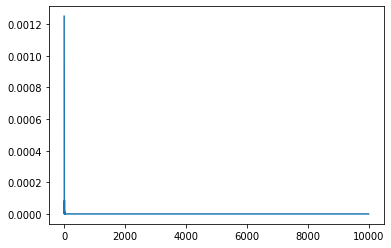

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(range(niter), cost)
plt.show()

Let us now vary one initial weight and let us re-run the training

In [11]:
W[0,0] = 2
W0[0,0] = 2

In [12]:
V,W,b,cost = train(X, YT, V, W, b, niter=niter)

Relative variation of the coefficients

In [13]:
print("Relative variations of W:", np.abs((W0-W)/W0))
print("Relative variations of V:", np.abs((V0-V)/V0))
print("Relative variations of b:", np.abs((b0-b)/b0))
print("Average cost first 100 iterations:", np.mean(cost[:100]))
print("Average cost last 100 iterations:", np.mean(cost[-100:]))

Relative variations of W: [[0.03513603 0.00809889 0.01645001]]
Relative variations of V: [[0.14518237        inf]
 [0.14087037 0.03669004]
 [       inf 0.01743937]]
Relative variations of b: [       inf 0.05364089        inf]
Average cost first 100 iterations: 0.007099955756029135
Average cost last 100 iterations: 2.470287297376848e-32


/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Plot of the cost durin the training

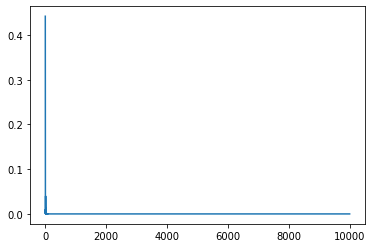

In [14]:
plt.plot(range(niter), cost)
plt.show()